In [12]:
import yfinance as yf
df = yf.download("^NSEI",start="1990-01-01", end="2025-09-30")
df.head()

C:\Users\ricky\AppData\Local\Temp\ipykernel_2532\3044400822.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("^NSEI",start="1990-01-01", end="2025-09-30")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI
Date,,,,,
2007-09-17,4494.649902,4549.049805,4482.850098,4518.450195,0
2007-09-18,4546.200195,4551.799805,4481.549805,4494.100098,0
2007-09-19,4732.350098,4739.000000,4550.250000,4550.250000,0
2007-09-20,4747.549805,4760.850098,4721.149902,4734.850098,0
2007-09-21,4837.549805,4855.700195,4733.700195,4752.950195,0


In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

df = df[['Open', 'High', 'Low', 'Close', 'Volume']]

df.dropna(inplace=True)
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)

In [4]:
X , y = [], []
lookback = 60

for i in range(lookback , len(scaled)):
    X.append(scaled[i-lookback:i])
    y.append(scaled[i,3])

X, y = np.array(X), np.array(y)

In [5]:
split = int(len(X) * 0.8)

X_train,X_test = X[:split],X[split:]
y_train,y_test = y[:split],y[split:]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model =  Sequential(
    [
        LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
        Dropout(0.2),
        LSTM(50, return_sequences=False),
        Dropout(0.2),
        Dense(25),
        Dense(1)
    ]
)
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

In [7]:
history = model.fit(
    X_train,y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1
)

Epoch 1/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0014 - val_loss: 0.0026
Epoch 2/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 4.5118e-04 - val_loss: 7.9489e-04
Epoch 3/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 3.5940e-04 - val_loss: 2.2270e-04
Epoch 4/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 2.8482e-04 - val_loss: 0.0015
Epoch 5/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 2.3743e-04 - val_loss: 9.6798e-04
Epoch 6/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 2.2069e-04 - val_loss: 0.0019
Epoch 7/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.0324e-04 - val_loss: 4.9504e-04
Epoch 8/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 1.8586e-04 - val_loss: 5.8493e-04
Epoch 9/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 1.7623e-04 - val_loss: 0.0010
Epoch 10/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 1.6761e-04 - val_loss: 3.4621e-04
Epoch 11/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 1.5597e-04 - val_loss: 2.2020

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


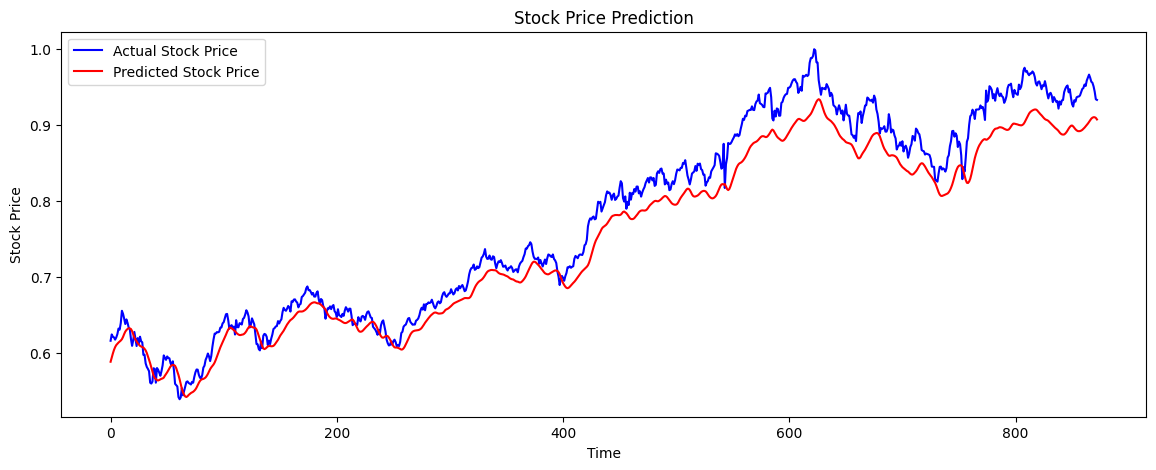

In [8]:
import matplotlib.pyplot as plt
pred = model.predict(X_test)

plt.figure(figsize=(14,5))
plt.plot(y_test, color='blue', label='Actual Stock Price')
plt.plot(pred, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [9]:
last_60_days = scaled[-60:]
last_60_days = last_60_days.reshape(1, -1, 5)

tommorow = model.predict(last_60_days)
print("Tommorow's predicted stock price:", tommorow[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Tommorow's predicted stock price: 0.90483737
